In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, Dataset
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

/home/shasankgunturu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


0. Insert and prepare Data
1. Design model - input, output size, forward pass
2. Construct loss and the optimizer
3. Training loop 

LinearRegression

In [5]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state=1)

In [6]:
# df = pd.read_csv('/home/shasankgunturu/ML/train.csv')
# X_numpy = np.array(df['x'])
# y_numpy = np.array(df['y'])

In [7]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [8]:
y = y.view(y.shape[0], 1)
X = X.view(X.shape[0], 1)
output_size = y.shape[1]
learning_rate = 0.3
n_iters = 100

In [9]:
model = nn.Linear(X.shape[1], output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
for epoch in range(n_iters):
    #forward pass
    y_predicted = model(X)
    loss = criterion(y, y_predicted)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 5743.9438
epoch: 11, loss = 332.5869
epoch: 21, loss = 332.5675
epoch: 31, loss = 332.5676
epoch: 41, loss = 332.5676
epoch: 51, loss = 332.5676
epoch: 61, loss = 332.5676
epoch: 71, loss = 332.5676
epoch: 81, loss = 332.5676
epoch: 91, loss = 332.5676


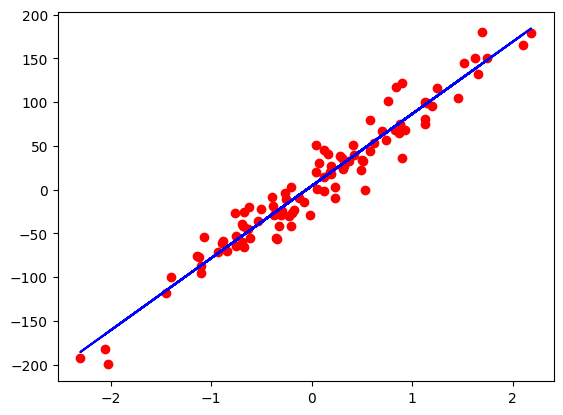

In [11]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

LogisticRegression

In [2]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [3]:
n_samples, n_features = X.shape
print(n_samples, n_features)

569 30


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
sc = StandardScaler() # recommended for logistic regression
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [16]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [17]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        #define layers:
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [18]:
model = LogisticRegression(n_features)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
n_iters = 500
for epoch in range(n_iters):
    y_predicted = model.forward(X_train)
    loss = criterion(y_predicted, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 0.7654
epoch: 11, loss = 0.1420
epoch: 21, loss = 0.1085
epoch: 31, loss = 0.0932
epoch: 41, loss = 0.0838
epoch: 51, loss = 0.0774
epoch: 61, loss = 0.0725
epoch: 71, loss = 0.0687
epoch: 81, loss = 0.0657
epoch: 91, loss = 0.0631
epoch: 101, loss = 0.0608
epoch: 111, loss = 0.0589
epoch: 121, loss = 0.0572
epoch: 131, loss = 0.0557
epoch: 141, loss = 0.0544
epoch: 151, loss = 0.0531
epoch: 161, loss = 0.0520
epoch: 171, loss = 0.0510
epoch: 181, loss = 0.0500
epoch: 191, loss = 0.0492
epoch: 201, loss = 0.0484
epoch: 211, loss = 0.0476
epoch: 221, loss = 0.0469
epoch: 231, loss = 0.0462
epoch: 241, loss = 0.0456
epoch: 251, loss = 0.0450
epoch: 261, loss = 0.0444
epoch: 271, loss = 0.0439
epoch: 281, loss = 0.0434
epoch: 291, loss = 0.0429
epoch: 301, loss = 0.0424
epoch: 311, loss = 0.0420
epoch: 321, loss = 0.0416
epoch: 331, loss = 0.0412
epoch: 341, loss = 0.0408
epoch: 351, loss = 0.0404
epoch: 361, loss = 0.0401
epoch: 371, loss = 0.0397
epoch: 381, loss = 0.03

In [20]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    accuracy = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {accuracy}:.4f')

accuracy = 0.9561403393745422:.4f


1. epoch = 1 forward and backward pass of all training samples
2. batch_size = number of training samples in one forward and backward pass
3. number_of_iterations = number of passes, each pass uses [batch_size] number of samples
4. 100 samples, batch_size = 20 ---> 100/20 = 5 iterations for 1 epoch

In [21]:
class SampleDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt("/home/shasankgunturu/machineLearning/datasets/wine.csv", delimiter=",", dtype=np.float32,skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples


In [22]:
dataset = SampleDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)
print(dataset.x.shape)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
torch.Size([178, 13])


In [23]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)
print(len(dataloader))
datatiter = iter(dataloader)
data = next(datatiter)
features, labels = data
print(features, labels)

45
tensor([[1.3580e+01, 2.5800e+00, 2.6900e+00, 2.4500e+01, 1.0500e+02, 1.5500e+00,
         8.4000e-01, 3.9000e-01, 1.5400e+00, 8.6600e+00, 7.4000e-01, 1.8000e+00,
         7.5000e+02],
        [1.4020e+01, 1.6800e+00, 2.2100e+00, 1.6000e+01, 9.6000e+01, 2.6500e+00,
         2.3300e+00, 2.6000e-01, 1.9800e+00, 4.7000e+00, 1.0400e+00, 3.5900e+00,
         1.0350e+03],
        [1.2170e+01, 1.4500e+00, 2.5300e+00, 1.9000e+01, 1.0400e+02, 1.8900e+00,
         1.7500e+00, 4.5000e-01, 1.0300e+00, 2.9500e+00, 1.4500e+00, 2.2300e+00,
         3.5500e+02],
        [1.2080e+01, 1.8300e+00, 2.3200e+00, 1.8500e+01, 8.1000e+01, 1.6000e+00,
         1.5000e+00, 5.2000e-01, 1.6400e+00, 2.4000e+00, 1.0800e+00, 2.2700e+00,
         4.8000e+02]]) tensor([[3.],
        [1.],
        [2.],
        [2.]])


In [24]:
num_epochs = 50
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)
model = LogisticRegression(dataset.x.shape[1])
criterion = nn.MSELoss()

178 45


In [25]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        y_predicted = model(inputs)
        # print(labels)
        loss = criterion(y_predicted, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch%1 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations} ,loss = {loss.item():.4f}')


epoch: 1/50, step: 1/45 ,loss = 1.0000
epoch: 1/50, step: 2/45 ,loss = 2.5000
epoch: 1/50, step: 3/45 ,loss = 1.2500
epoch: 1/50, step: 4/45 ,loss = 2.5000
epoch: 1/50, step: 5/45 ,loss = 2.2500
epoch: 1/50, step: 6/45 ,loss = 0.5000
epoch: 1/50, step: 7/45 ,loss = 1.0000
epoch: 1/50, step: 8/45 ,loss = 2.2500
epoch: 1/50, step: 9/45 ,loss = 0.7500
epoch: 1/50, step: 10/45 ,loss = 0.2500
epoch: 1/50, step: 11/45 ,loss = 2.5000
epoch: 1/50, step: 12/45 ,loss = 1.2500
epoch: 1/50, step: 13/45 ,loss = 0.7500
epoch: 1/50, step: 14/45 ,loss = 0.2500
epoch: 1/50, step: 15/45 ,loss = 2.2500
epoch: 1/50, step: 16/45 ,loss = 2.2500
epoch: 1/50, step: 17/45 ,loss = 1.2500
epoch: 1/50, step: 18/45 ,loss = 1.2500
epoch: 1/50, step: 19/45 ,loss = 1.5000
epoch: 1/50, step: 20/45 ,loss = 2.2500
epoch: 1/50, step: 21/45 ,loss = 1.5000
epoch: 1/50, step: 22/45 ,loss = 2.2500
epoch: 1/50, step: 23/45 ,loss = 0.7500
epoch: 1/50, step: 24/45 ,loss = 1.0000
epoch: 1/50, step: 25/45 ,loss = 3.0000
epoch: 1/

epoch: 5/50, step: 1/45 ,loss = 2.2500
epoch: 5/50, step: 2/45 ,loss = 1.2500
epoch: 5/50, step: 3/45 ,loss = 0.0000
epoch: 5/50, step: 4/45 ,loss = 2.2500
epoch: 5/50, step: 5/45 ,loss = 1.2500
epoch: 5/50, step: 6/45 ,loss = 2.2500
epoch: 5/50, step: 7/45 ,loss = 1.7500
epoch: 5/50, step: 8/45 ,loss = 1.5000
epoch: 5/50, step: 9/45 ,loss = 0.7500
epoch: 5/50, step: 10/45 ,loss = 1.2500
epoch: 5/50, step: 11/45 ,loss = 1.2500
epoch: 5/50, step: 12/45 ,loss = 2.5000
epoch: 5/50, step: 13/45 ,loss = 1.0000
epoch: 5/50, step: 14/45 ,loss = 2.0000
epoch: 5/50, step: 15/45 ,loss = 1.5000
epoch: 5/50, step: 16/45 ,loss = 0.2500
epoch: 5/50, step: 17/45 ,loss = 1.7500
epoch: 5/50, step: 18/45 ,loss = 0.5000
epoch: 5/50, step: 19/45 ,loss = 0.5000
epoch: 5/50, step: 20/45 ,loss = 0.7500
epoch: 5/50, step: 21/45 ,loss = 2.5000
epoch: 5/50, step: 22/45 ,loss = 2.2500
epoch: 5/50, step: 23/45 ,loss = 1.5000
epoch: 5/50, step: 24/45 ,loss = 0.5000
epoch: 5/50, step: 25/45 ,loss = 0.5000
epoch: 5/

In [26]:
# for transforms

class SampleDatasetwithTransform(Dataset):
    def __init__(self, transform=None):
        xy = np.loadtxt("/home/shasankgunturu/machineLearning/datasets/wine.csv", delimiter=",", dtype=np.float32,skiprows=1)
        self.x = (xy[:, 1:])
        self.y = (xy[:, [0]])
        self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.n_samples


In [27]:
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [28]:
class ToMul:
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, sample):
        inputs, labels = sample
        inputs*=self.factor
        return inputs, labels

In [29]:
# dataset = SampleDatasetwithTransform(transform=ToTensor())
# dataset_notransform = SampleDatasetwithTransform(transform=None)
# first_data = dataset[0]
# features, labels = first_data
# print(type(features), type(labels))
# first_data = dataset_notransform[0]
# features, labels = first_data
# print(type(features), type(labels))

In [30]:
# print(dataset.x[0])
# print(np.mean(dataset.x))
# print(np.std(dataset.x))
mean = [0.5]*13
std = [0.5]*13
composed = torchvision.transforms.Compose([ToTensor(), ToMul(4)])
# composed = torchvision.transforms.Normalize(mean, std)#, torchvision.transforms.ToTensor())
dataset = SampleDatasetwithTransform(transform=composed)
print(dataset[0])

(tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]), tensor([1.]))


softmax and cross entropy

In [31]:
# softmax
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

#cross entropy
def cross_entropy(actual, predicted):
    loss = -np.sum(actual*np.log(predicted))
    return loss

y = np.array([1,0,0])

y_predicted = np.array([2.2,0.2, 1.9])
y_predicted = softmax(y_predicted)
print(y_predicted)
print(cross_entropy(y, y_predicted))

y_predicted_bad = np.array([0.2,1.2, 1.9])
y_predicted_bad = softmax(y_predicted_bad)
print(y_predicted_bad)
print(cross_entropy(y, y_predicted_bad))

[0.53300543 0.07213444 0.39486013]
0.6292236723529216
[0.10878754 0.29571519 0.59549727]
2.21835847715745


In [32]:
t = torch.tensor([2,0,1])

y_good_prediction = torch.tensor([[0.1,0.6,1.4], [2.1,0.6,1.4], [0.1,2.6,1.4]])
y_bad_prediction = torch.tensor([[0.1,3.6,1.4], [2.1,3.6,1.4], [0.1,2.6,3.4]])

loss = nn.CrossEntropyLoss()
l1 = loss(y_good_prediction, t)
l2 = loss(y_bad_prediction, t)
print(l1.item())
print(l2.item())

_, prediction_good = torch.max(y_good_prediction, 1)
_, prediction_bad = torch.max(y_bad_prediction, 1)
print(prediction_good)
print(prediction_bad)

0.47000715136528015
1.7720893621444702
tensor([2, 0, 1])
tensor([1, 1, 2])
